In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install tensorflow keras numpy matplotlib pandas sklearn Bio

In [0]:
#import the libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re, ast
import keras
np.random.seed(1000)
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.regularizers import l1

Using TensorFlow backend.


Class 0: 428
Class 1: 56
Proportion: 7.64 : 1


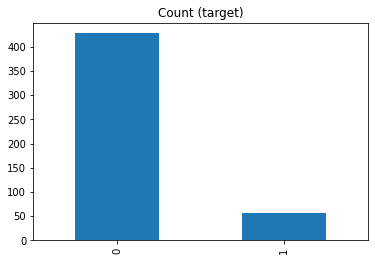

In [0]:

df_test=pd.read_csv('/content/drive/My Drive/Colab_Notebooks/test_Binary_Encoding.csv')
target_count = df_test.Glutarylation.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');


In [0]:
# Class count
test_count_class_0, test_tcount_class_1 = df_test.Glutarylation.value_counts()

# Divide by class
test_class_0 = df_test[df_test.Glutarylation == 0]
test_class_1 = df_test[df_test.Glutarylation == 1]
print(len(test_class_0))

428


Random over-sampling:
1    428
0    428
Name: Glutarylation, dtype: int64


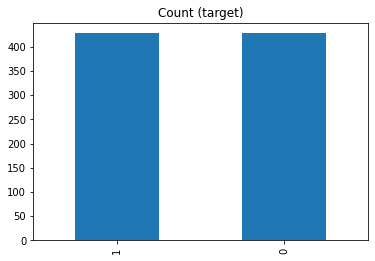

In [0]:

import pandas as pd
test_class_1_over = test_class_1.sample(test_count_class_0, replace=True)
df_test_over = pd.concat([test_class_0, test_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Glutarylation.value_counts())

df_test_over.Glutarylation.value_counts().plot(kind='bar', title='Count (target)');

In [0]:
#Load the test data
np_list=[]
x=df_test_over.Image_Array
y=df_test_over.Glutarylation
y_test=np.array(y)
print(y_test)
for i in x:
    npp=np.array(ast.literal_eval(i))
    np_list.append(npp)
print(np_list[0])
X_test=np.array(np_list)
print(len(X_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Class 0: 3498
Class 1: 590
Proportion: 5.93 : 1


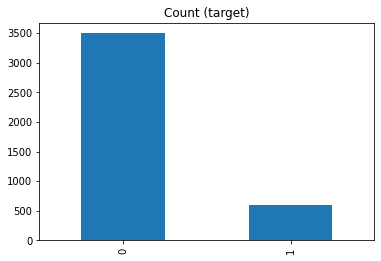

In [0]:

df_train=pd.read_csv('/content/drive/My Drive/Colab_Notebooks/train_Binary_Encoding.csv')
target_count = df_train.Glutarylation.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [0]:
# Class count
train_count_class_0, train_count_class_1 = df_train.Glutarylation.value_counts()

# Divide by class
train_class_0 = df_train[df_train.Glutarylation == 0]
train_class_1 = df_train[df_train.Glutarylation == 1]
print(len(train_class_0))

3498


Random over-sampling:
1    3498
0    3498
Name: Glutarylation, dtype: int64


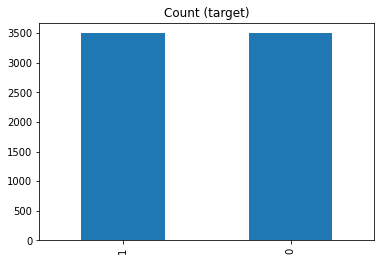

In [0]:

import pandas as pd
train_class_1_over = train_class_1.sample(train_count_class_0, replace=True)
df_train_over = pd.concat([train_class_0, train_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.Glutarylation.value_counts())

df_train_over.Glutarylation.value_counts().plot(kind='bar', title='Count (target)');

In [0]:
X=df_train_over.Image_Array

In [0]:
Y=df_train_over.Glutarylation

In [0]:
NP_list=[]
y_train=np.array(Y)
print(len(y_train))
for i in X:
    NP=np.array(ast.literal_eval(i))
    NP_list.append(NP)
print(len(NP_list[0]))
X_train=np.array(NP_list)
print(len(X_train))
print(X_train[0])

6996
35
6996
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [0]:
# #split data into train and test sets
# X_train,X_val,y_train,y_val=train_test_split(image,level,validation_split=0.2,random_state=20)
print(len(X_train))
print(len(X_test))

6996
856


In [0]:
#Reshape the data to fit the model
X_train = X_train.reshape(6996,35,21,1)
X_test = X_test.reshape(856,35,21,1)

In [0]:
# One-Hot Encode target column (Y-Data sets) : Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
#Build the CNN model
model = Sequential()

In [0]:
model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same", input_shape=(35,21,1)))
model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same"))
model.add(Conv2D(128, kernel_size=3, activation='relu',padding="same"))
model.add(Dropout(0.4))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
model.add(Conv2D(64, kernel_size=3, activation='relu',padding="same"))
model.add(Dropout(0.4))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=2, activation='softmax'))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
#Compile the model
from keras.optimizers import Adam, SGD
opt = Adam(lr=1.0e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Train the model
#Batch: Total number of training examples present in a single batch (None = default 32)
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
#Fit: Another word for train
hist = model.fit(X_train, y_train_one_hot, validation_split=0.20, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5596 samples, validate on 1400 samples
Epoch 1/10





5596/5596 [==============================] - 17s 3ms/step - loss: 0.6650 - acc: 0.6240 - val_loss: 0.9238 - val_acc: 0.0000e+00
Epoch 2/10
5596/5596 [==============================] - 3s 467us/step - loss: 0.6657 - acc: 0.6251 - val_loss: 0.9954 - val_acc: 0.0000e+00
Epoch 3/10
5596/5596 [==============================] - 3s 466us/step - loss: 0.6619 - acc: 0.6251 - val_loss: 0.9543 - val_acc: 0.0000e+00
Epoch 4/10
5596/5596 [==============================] - 3s 453us/step - loss: 0.6610 - acc: 0.6251 - val_loss: 0.9238 - val_acc: 0.0000e+00
Epoch 5/10
5596/5596 [==============================] - 2s 438us/step - loss: 0.6550 - acc: 0.6235 - val_loss: 0.7599 - val_acc: 0.4143
Epoch 6/10
5596/5596 [==============================] - 3s 455us/step - loss: 0.6430 - acc: 0.6328 - val_loss: 0.9755 - val_acc: 0.2343
Epoch 7/10
5596/559

In [0]:
#Show predictions as probabilites for the first 4 images in the test set
predictions = model.predict(X_test)
predictions 

array([[0.3822874 , 0.6177126 ],
       [0.84897137, 0.15102862],
       [0.6222052 , 0.37779474],
       ...,
       [0.29613888, 0.7038611 ],
       [0.4980321 , 0.5019679 ],
       [0.3495995 , 0.6504005 ]], dtype=float32)

In [0]:
#Print our predicitons as number labels for the first 4 images
y_pred=( np.argmax(predictions,axis=1))
#Print the actual labels
print(y_pred)

[1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 1 

In [0]:
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

856/856 [==============================] - 0s 139us/step
Test results - Loss: 0.6071494349809451 - Accuracy: 72.5467290276679%


In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y_test,y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Report : ')
print (classification_report(y_test,y_pred))

Confusion Matrix :
[[336  92]
 [143 285]]
Accuracy Score : 0.7254672897196262
Report : 
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       428
           1       0.76      0.67      0.71       428

    accuracy                           0.73       856
   macro avg       0.73      0.73      0.72       856
weighted avg       0.73      0.73      0.72       856



In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print(lr_auc)

0.7585051096165605
